### Naive Bayes Training Script
#### Author: Austin Fernandez
#### Date Modified: April 8, 2020

In [12]:
# dependencies
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import CategoricalNB, ComplementNB, MultinomialNB
# from sklearn.naive_bayes import ComplementNB, MultinomialNB
import numpy as np
from scipy.stats import uniform, norm
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [3]:
x_train = np.empty((0,5))
y_train = np.array([])
    
with open("Toy Dataset.csv","r") as f:
    d_reader = csv.reader(f,delimiter=",",quotechar="\"")
    first = True
    for line in d_reader:
        if first:
            first = False
            continue
        x_train = np.append(x_train,np.array(list(map(int,line[2:7]))).reshape((1,5)),axis=0)
        y_train = np.append(y_train,int(line[8]))
print(x_train.shape)
print(y_train.shape)
# print(y_train)

(419, 5)
(419,)


In [14]:
# MultinomialNB, Grid Search

parameters = {'alpha':[0.01 * i for i in range(1,101)], 'fit_prior':[True, False]}
mnb = MultinomialNB()
grid_search_multinomial = GridSearchCV(mnb, parameters,cv=10)
grid_search_multinomial.fit(x_train,y_train)
print("Best Score: {:.4f}".format(gscv.best_score_))
for k,v in grid_search_multinomial.best_params_.items():
    print("{} => {}".format(k,v))
print("Splits: {}".format(grid_search_multinomial.n_splits_))
y_out = grid_search_multinomial.predict(x_train)
print("Accuracy: {:.4f}%".format(np.mean(y_out == y_train) * 100.0))
# print(y_out)


Best Score: 0.3175
alpha => 0.08
fit_prior => True
Splits: 10
Accuracy: 31.7422%


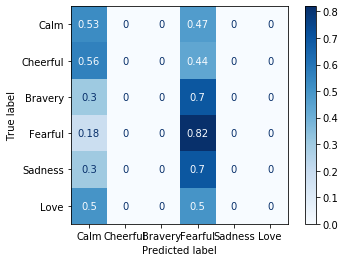

In [15]:
disp = plot_confusion_matrix(grid_search_multinomial, x_train, y_train,
                             display_labels=["Calm","Cheerful","Bravery","Fearful","Sadness","Love"],
                             cmap=plt.cm.Blues,
                             normalize='true')

In [17]:
# CategoricalNB, Grid Search
parameters = {'alpha':[0.01 * i for i in range(1,101)], 'fit_prior':[True, False]}
canb = CategoricalNB()
grid_search_categorical = GridSearchCV(canb, parameters,cv=10)
grid_search_categorical.fit(x_train,y_train)
print("Best Score: {:.4f}".format(grid_search_categorical.best_score_))
for k,v in grid_search_categorical.best_params_.items():
    print("{} => {}".format(k,v))
print("Splits: {}".format(grid_search_categorical.n_splits_))
y_out = grid_search_categorical.predict(x_train)
print("Accuracy: {:.4f}%".format(np.mean(y_out == y_train) * 100.0))
# print(y_out)

Best Score: 0.3271
alpha => 0.01
fit_prior => True
Splits: 10
Accuracy: 33.8902%


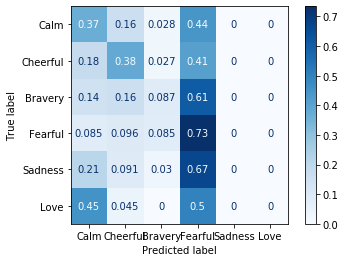

In [18]:
disp = plot_confusion_matrix(grid_search_categorical, x_train, y_train,
                             display_labels=["Calm","Cheerful","Bravery","Fearful","Sadness","Love"],
                             cmap=plt.cm.Blues,
                             normalize='true')

In [19]:
# ComplementNB, Grid Search
parameters = {'alpha':[0.01 * i for i in range(1,101)], 'fit_prior':[True, False], 'norm' : [True, False]}
cnb = ComplementNB()
grid_search_complement = GridSearchCV(cnb, parameters,cv=10)
grid_search_complement.fit(x_train,y_train)
print("Best Score: {:.4f}".format(gscv.best_score_))
for k,v in grid_search_complement.best_params_.items():
    print("{} => {}".format(k,v))
print("Splits: {}".format(grid_search_complement.n_splits_))
y_out = grid_search_complement.predict(x_train)
print("Accuracy: {:.4f}%".format(np.mean(y_out == y_train) * 100.0))
# print(y_out)

Best Score: 0.3175
alpha => 0.01
fit_prior => True
norm => False
Splits: 10
Accuracy: 31.7422%


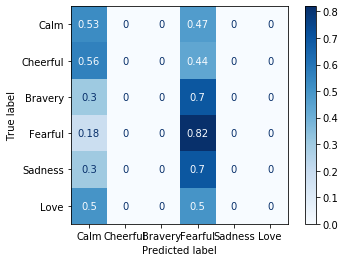

In [20]:
disp = plot_confusion_matrix(grid_search_complement, x_train, y_train,
                             display_labels=["Calm","Cheerful","Bravery","Fearful","Sadness","Love"],
                             cmap=plt.cm.Blues,
                             normalize='true')

In [21]:
# ComplementNB, RandomizedSearch
random_search_iterations = 1000
k_folds = 10

parameters = {'alpha':uniform(loc=0,scale=1.0), 'fit_prior':[True, False], 'norm' : [True, False]}
cnb = ComplementNB()
random_search_complement = RandomizedSearchCV(cnb, parameters,cv=k_folds,n_iter=random_search_iterations)
random_search_complement.fit(x_train,y_train)
print("Best Score: {:.4f}".format(rscv.best_score_))
for k,v in random_search_complement.best_params_.items():
    print("{} => {}".format(k,v))
print("Splits: {}".format(random_search_complement.n_splits_))
y_out = random_search_complement.predict(x_train)
print("Accuracy: {:.4f}%".format(np.mean(y_out == y_train) * 100.0))
# print(y_out)

Best Score: 0.3175
alpha => 0.5530482392685249
fit_prior => False
norm => False
Splits: 10
Accuracy: 31.7422%


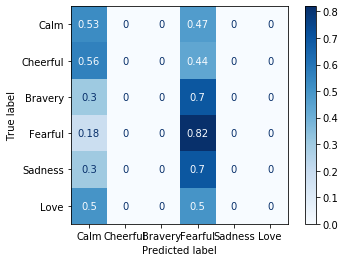

In [22]:
disp = plot_confusion_matrix(random_search_complement, x_train, y_train,
                             display_labels=["Calm","Cheerful","Bravery","Fearful","Sadness","Love"],
                             cmap=plt.cm.Blues,
                             normalize='true')

In [23]:
# CategoricalNB, RandomizedSearch
random_search_iterations = 1000
k_folds = 10

parameters = {'alpha':uniform(loc=0,scale=1.0), 'fit_prior':[True, False]}
canb = CategoricalNB()
random_search_categorical = RandomizedSearchCV(canb, parameters,cv=k_folds,n_iter=random_search_iterations)
random_search_categorical.fit(x_train,y_train)
print("Best Score: {:.4f}".format(rscv.best_score_))
for k,v in random_search_categorical.best_params_.items():
    print("{} => {}".format(k,v))
print("Splits: {}".format(random_search_categorical.n_splits_))
y_out = random_search_categorical.predict(x_train)
print("Accuracy: {:.4f}%".format(np.mean(y_out == y_train) * 100.0))
# print(y_out)

Best Score: 0.3175
alpha => 0.7937074212226963
fit_prior => True
Splits: 10
Accuracy: 33.8902%


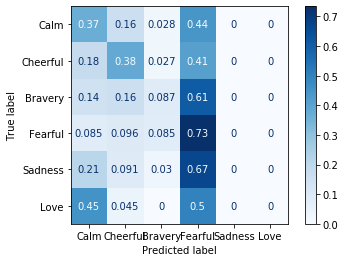

In [24]:
disp = plot_confusion_matrix(random_search_categorical, x_train, y_train,
                             display_labels=["Calm","Cheerful","Bravery","Fearful","Sadness","Love"],
                             cmap=plt.cm.Blues,
                             normalize='true')

In [25]:
# MultinomialNB, RandomizedSearch
random_search_iterations = 1000
k_folds = 10

parameters = {'alpha':uniform(loc=0,scale=1.0), 'fit_prior':[True, False]}
mnb = MultinomialNB()
random_search_multinomial = RandomizedSearchCV(mnb, parameters,cv=k_folds,n_iter=random_search_iterations)
random_search_multinomial.fit(x_train,y_train)
print("Best Score: {:.4f}".format(rscv.best_score_))
for k,v in random_search_multinomial.best_params_.items():
    print("{} => {}".format(k,v))
print("Splits: {}".format(random_search_multinomial.n_splits_))
y_out = random_search_multinomial.predict(x_train)
print("Accuracy: {:.4f}%".format(np.mean(y_out == y_train) * 100.0))
# print(y_out)

Best Score: 0.3175
alpha => 0.17768826067983268
fit_prior => True
Splits: 10
Accuracy: 31.7422%


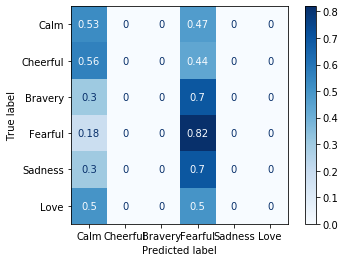

In [26]:
disp = plot_confusion_matrix(random_search_multinomial, x_train, y_train,
                             display_labels=["Calm","Cheerful","Bravery","Fearful","Sadness","Love"],
                             cmap=plt.cm.Blues,
                             normalize='true')